<a href="https://colab.research.google.com/github/sehxxnee/AI/blob/main/AI_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Car Price Prediction Program using Linear Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from google.colab import drive
import numpy as np

In [ ]:
drive.mount('/content/drive')
car_data = pd.read_csv('/content/drive/My Drive/car_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(car_data.head())

if 'Car_Name' in car_data.columns:
    car_data.drop(columns=['Car_Name'], inplace=True)

car_data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

car_data = pd.get_dummies(car_data, columns=['Seller_Type', 'Transmission'], drop_first=True)

X = car_data.drop(['Selling_Price'], axis=1)
y = car_data['Selling_Price']

print("\nFeature Matrix Shape (X):", X.shape)
print("Target Vector Shape (y):", y.shape)

   Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000          0      Dealer   
1  2013           4.75           9.54       43000          1      Dealer   
2  2017           7.25           9.85        6900          0      Dealer   
3  2011           2.85           4.15        5200          0      Dealer   
4  2014           4.60           6.87       42450          1      Dealer   

  Transmission  Owner  
0       Manual      0  
1       Manual      0  
2       Manual      0  
3       Manual      0  
4       Manual      0  

Feature Matrix Shape (X): (301, 7)
Target Vector Shape (y): (301,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

def normalize_predictions(predictions, min_price=1.0, max_price=50.0):
    normalized_predictions = np.clip(predictions, min_price, max_price)
    return normalized_predictions

normalized_lr_predictions = normalize_predictions(lr_predictions)

print("MAE :", metrics.mean_absolute_error(y_test, lr_predictions))
print("MSE :", metrics.mean_squared_error(y_test, lr_predictions))
print("R2 Score :", metrics.r2_score(y_test, lr_predictions))

MAE : 1.258140470647337
MSE : 3.493286026225147
R2 Score : 0.8773175030338536


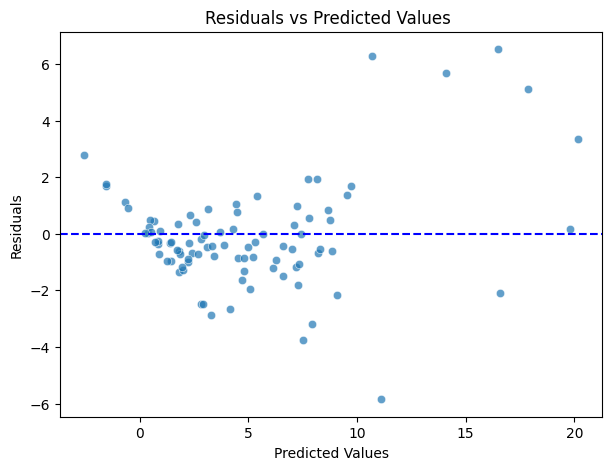

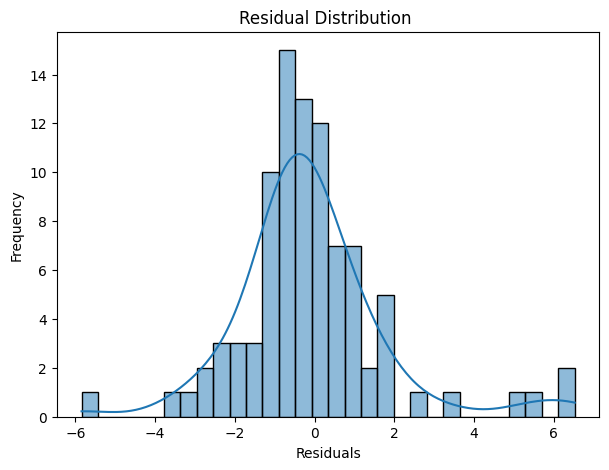

In [ ]:
residuals = y_test - lr_predictions

plt.figure(figsize=(7, 5))
sns.scatterplot(x=lr_predictions, y=residuals, alpha=0.7)
plt.axhline(0, color='blue', linestyle='--')
plt.title('Residuals vs Predicted Values ')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residual Distribution ')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Number of Outliers: 4


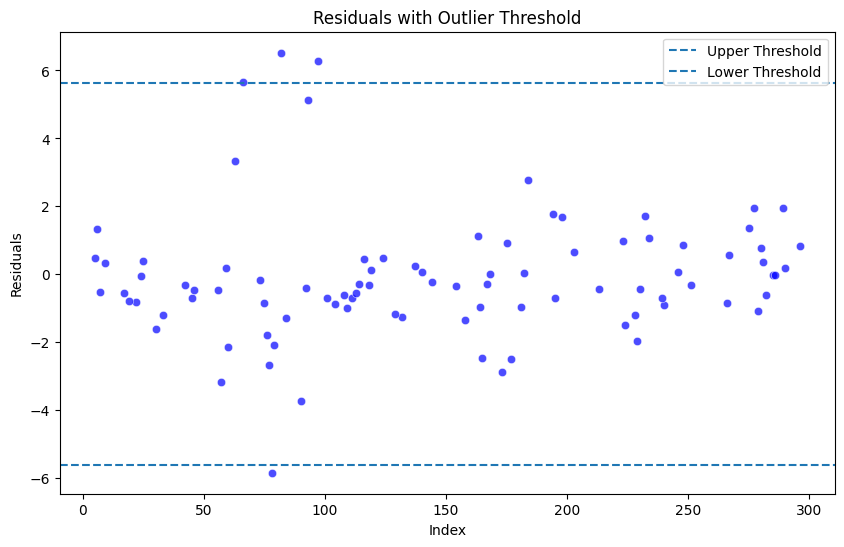

In [ ]:
outlier_threshold = 3 * residuals.std()
outliers = residuals[np.abs(residuals) > outlier_threshold]

print(f"Number of Outliers: {len(outliers)}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.index, y=residuals, alpha=0.7, color='blue')
plt.axhline(outlier_threshold, linestyle='--', label='Upper Threshold')
plt.axhline(-outlier_threshold, linestyle='--', label='Lower Threshold')
plt.title('Residuals with Outlier Threshold')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.legend()
plt.show()

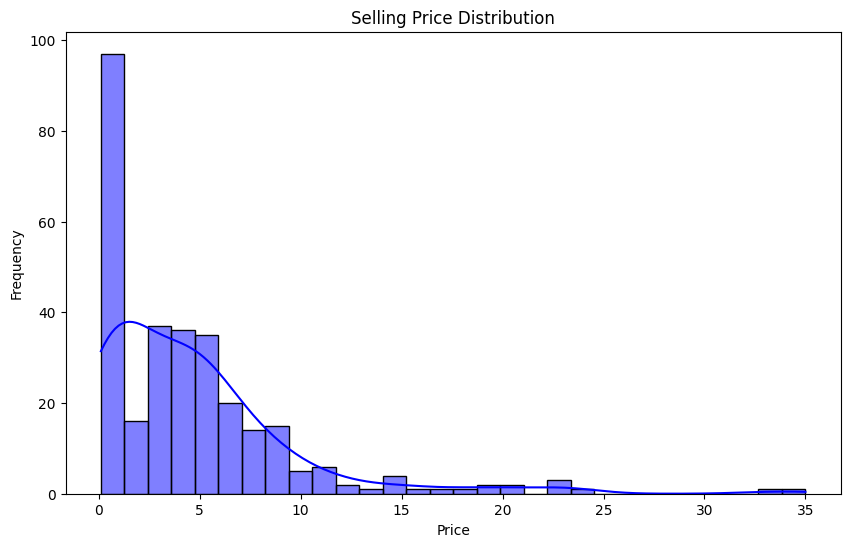

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Selling_Price'], kde=True, bins=30, color='blue')
plt.title('Selling Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

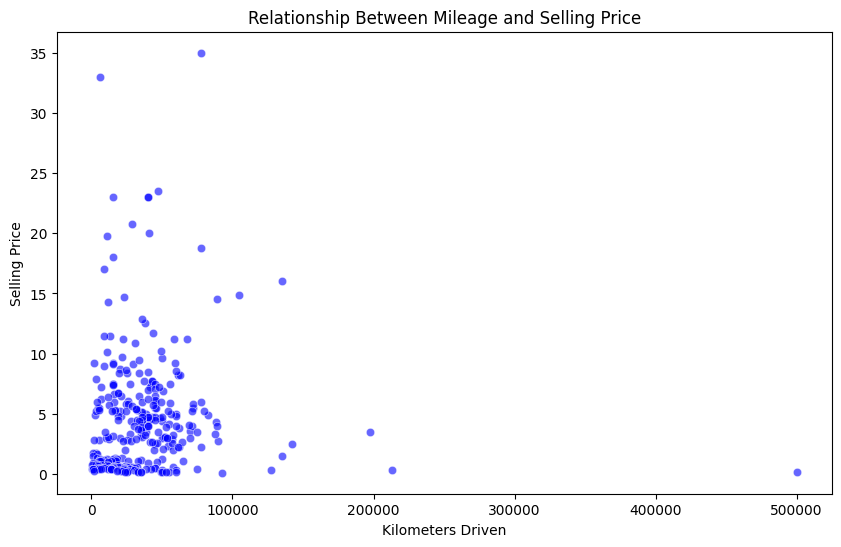

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=car_data['Kms_Driven'], y=car_data['Selling_Price'], alpha=0.6, color='blue')
plt.title('Relationship Between Mileage and Selling Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()


Linear Regression Coefficients:
                         Coefficient
Present_Price              3.807226
Year                       1.058909
Fuel_Type                  0.621975
Kms_Driven                -0.160829
Owner                     -0.292946
Transmission_Manual       -0.450255
Seller_Type_Individual    -0.540353


<ipython-input-29-defeb387b973>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.Coefficient, y=coefficients.index, palette='viridis', dodge=False, legend=False)


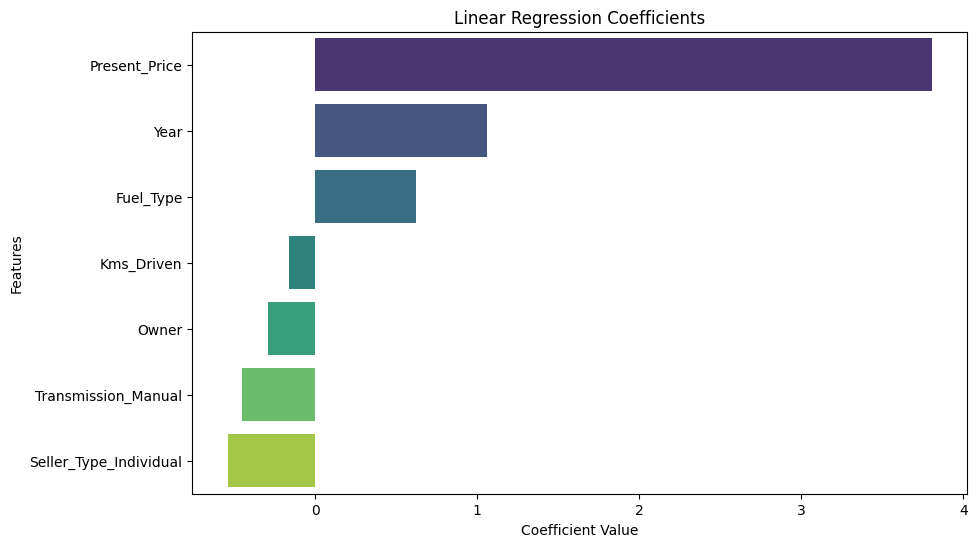

In [ ]:
coefficients = pd.DataFrame(lr_model.coef_, index=X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
print("\nLinear Regression Coefficients:\n", coefficients)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.Coefficient, y=coefficients.index, palette='viridis', dodge=False, legend=False)
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

In [ ]:
price_bins = pd.qcut(y_test, q=3, labels=['Low', 'Medium', 'High'])

results = pd.DataFrame({'Actual': y_test, 'Predicted': lr_predictions, 'Price Bin': price_bins})

for price_bin in results['Price Bin'].unique():
    bin_data = results[results['Price Bin'] == price_bin]
    mae = metrics.mean_absolute_error(bin_data['Actual'], bin_data['Predicted'])
    r2 = metrics.r2_score(bin_data['Actual'], bin_data['Predicted'])
    print(f"\nPerformance for {price_bin} Price Range:")
    print(f"MAE: {mae:.2f}, R2: {r2:.2f}")


Performance for Low Price Range:
MAE: 0.94, R2: -11.92

Performance for High Price Range:
MAE: 1.72, R2: 0.81

Performance for Medium Price Range:
MAE: 1.11, R2: -1.11


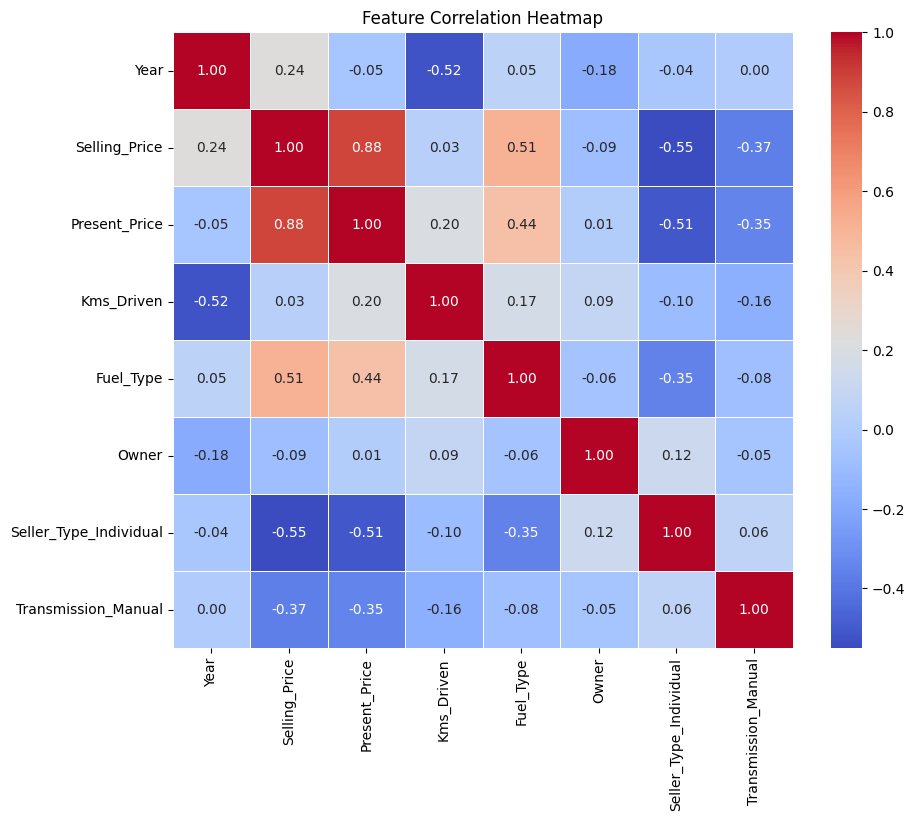

In [ ]:
correlation_matrix = car_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()